**Problem 5 : Play with the code**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

In [2]:
class Network(object):
    def __init__(self, n):
        # Initialize the weights randomly
        self.W = np.random.randn(n, 784)
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, n)
        self.bprime = np.random.randn(10)

    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = sigmoid(np.dot(self.W, x)+self.b)
        return sigmoid(np.dot(self.V, a)+self.bprime)

    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)

        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1

            y[ylabel] -= 1.0
            total_cost += 0.5*np.dot(y, y)

        return total_cost / n_samples, correct_samples / n_samples


    def update_mini_batch(self, mini_batch, eta):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)

        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime

        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime

    def SGD(self, training_data, epochs, mini_batch_size,
            eta, test_data=[]):
        # Run SGD with those parameters
        # Return a list of results for every epoch
        # For each epoch, append pair (self.evaluate(training_data),
        #        self.evaluate(test_data))
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta)

            res.append((self.evaluate(training_data),
                       self.evaluate(test_data)))

            print('Epoch '+str(i)+' finished')

        return res


### THE PART BELOW WILL BE EXPLAINED LATER

    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = sigmoid(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = sigmoid(z2)

        # backward
        delta_2 = self.cost_derivative(a2, y) * sigmoid_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)

        delta_1 = np.dot(self.V.transpose(), delta_2) * sigmoid_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)

        return nabla_W, nabla_b, nabla_V, nabla_bprime

    def cost_derivative(self, output_activations, ylabel):
        r"""Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])

    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)

In [3]:
def sigmoid(z):
    return 1 / (1.0+np.exp(-z))
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [11]:
def load_data():
    # Note you have to update the path below
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return training_data, validation_data, test_data

In [12]:
TRAIN, VALIDATION, TEST = load_data()

In [13]:
len(TRAIN), len(TRAIN[0]), len(TRAIN[1])

(2, 50000, 50000)

In [ ]:
TRAIN[0][0].shape, TRAIN[1][0]

((784,), 5)

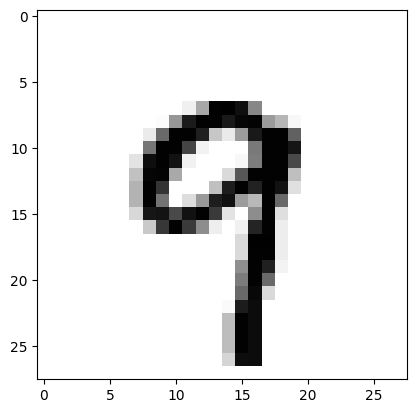

In [14]:
IM = np.reshape(TRAIN[0][170], (28, 28))
plt.imshow(1-IM, cmap='gray')

In [15]:
TRAIN[1][170]

9

In [16]:
def zip_data(D):
    return list(zip(D[0], D[1]))

In [17]:
train_data = zip_data(TRAIN)
validation_data = zip_data(VALIDATION)
test_data = zip_data(TEST)

In [21]:
def plot_results(res):
    X = list(range(len(res)))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    train_acc = [x[0][1] for x in res]
    test_acc = [x[1][1] for x in res]
    ax1.plot(X, train_acc, label='train')
    ax1.plot(X, test_acc, label='test')
    ax1.set_title('Accuracy')
    ax1.legend()

    train_cost = [x[0][0] for x in res]
    test_cost = [x[1][0] for x in res]
    ax2.plot(X, train_cost, label='train')
    ax2.plot(X, test_cost, label='test')
    ax2.set_title('Loss')
    ax2.legend()

**Let Start play with the Code from here.**

Let play with the number of neuron .
We will choose a small one (5) and a large one (100) to compare.

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


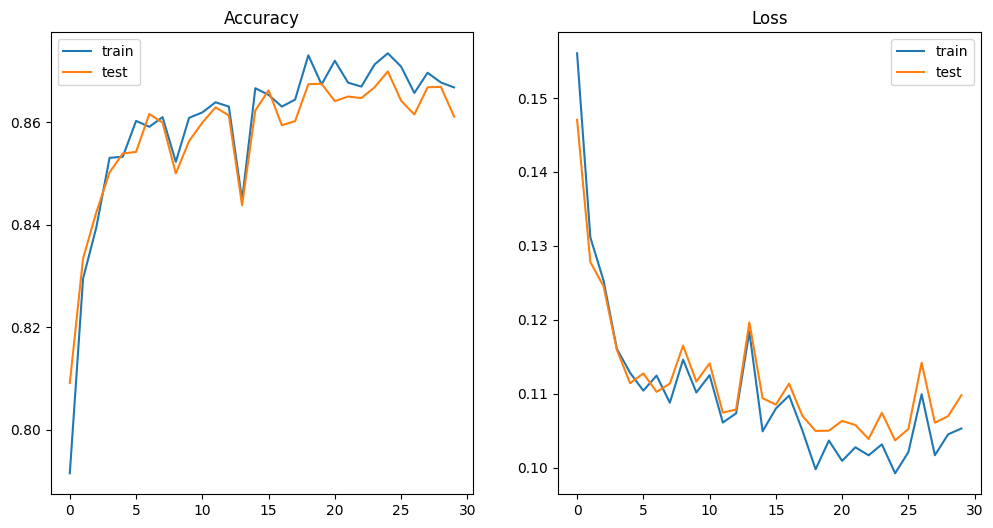

In [41]:
Net1=Network(5)
result1=Net1.SGD(train_data, 30, 10, 3.0, test_data)
plot_results(result1)

In [44]:
np.max([x[1][1] for x in result1])

0.8699

The best accuracy on test data we got is **86.99%**.

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


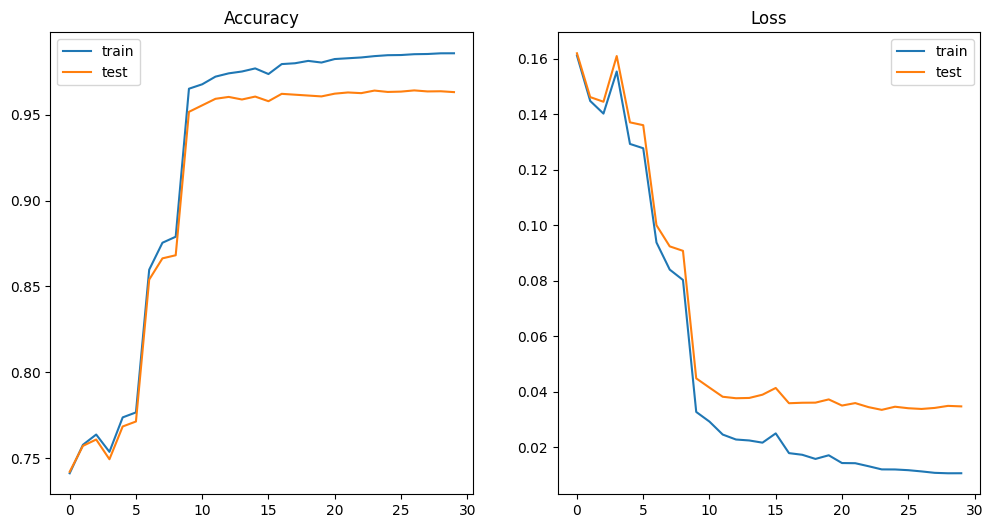

In [45]:
Net2=Network(100)
result2=Net2.SGD(train_data, 30, 10, 3.0, test_data)
plot_results(result2)

In [47]:
np.max([x[1][1] for x in result2])

0.9643

The best accuracy on test data we got is **96.43%**.

**Conclusion**

We can conclude that choose a large number of neuron have really increase our accuracy, this is good but more neuron mean more time for computation. For this it take around 15min but for real data this can take year. So as it is an hyperparameter we don't really have a rule to decide if a large or a small one is a good idea.

**Let change the number of mini bacth size**,

 but keep the order parameters as best as during the lecture.


In first time we will choose a  small as possible , that is, 1 and will compare with  what we have when we choose a big size for example 2000.

In [19]:
NET3_size1 = Network(30)
results3 = NET3_size1.SGD(train_data, 30, 1, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished


<ipython-input-3-46a8ef3da670>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1.0+np.exp(-z))


Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


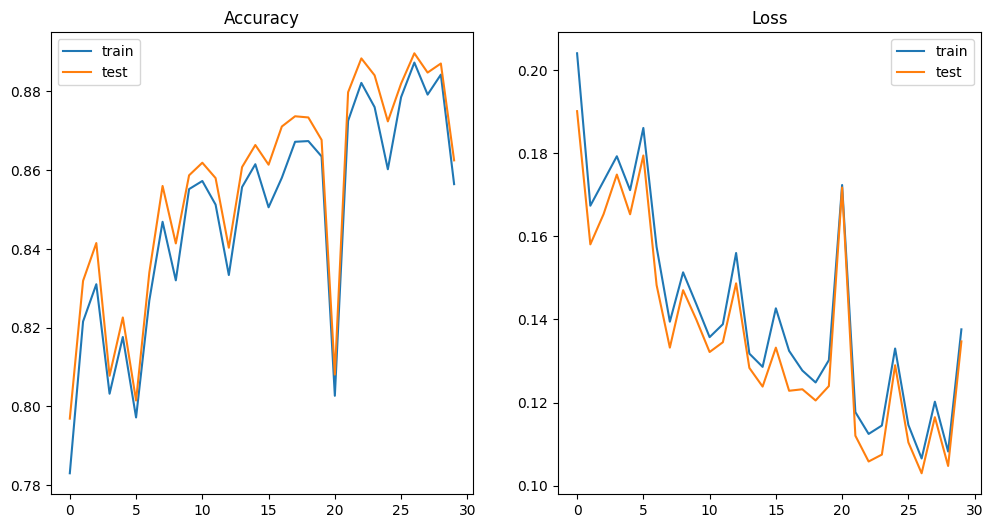

In [22]:
plot_results(results3)

In [24]:
np.max([x[1][1] for x in results3])

0.8897

The best accuracy on test data we got is **88.97%**.

**What do we have for a mini-batch size 2000?**

In [25]:
NET3_size2000 = Network(30)
results4 = NET3_size2000.SGD(train_data, 30, 2000, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


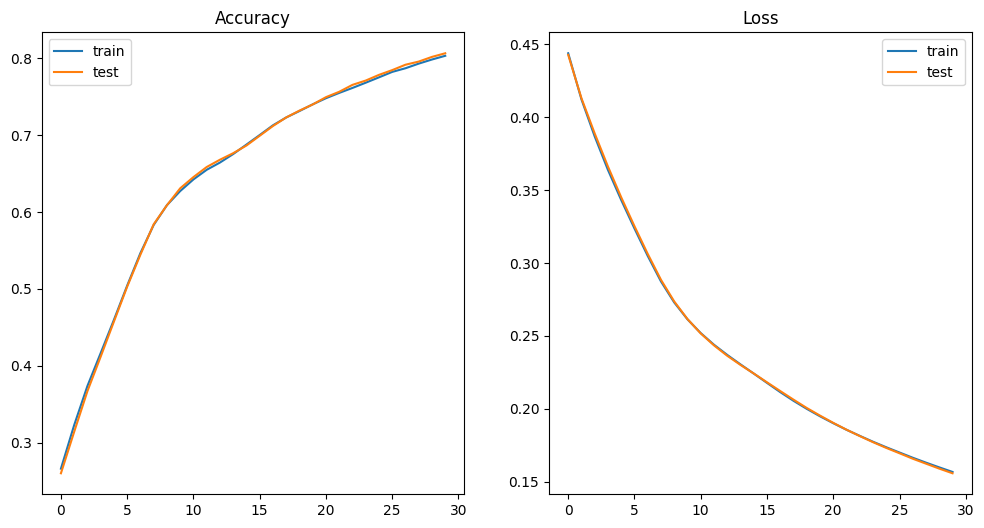

In [26]:
plot_results(results4)

In [27]:
np.max([x[1][1] for x in results4])

0.8066

The best accuracy on test data we got is **80.66%**.

**Remark and Conclusion**


For a mini-batch size equal to 1 (very small)we can remark that the accuracy is very unstable , this mean that it can be good sometime and very bad another time.This is due to the fact that for each observation the parameters will be update and the information in one observation is not a very good estimation of the overall data.Also it best accuracy is less than what we got during the lecture.


For a mini-batch size equal to 2000 (very large), we can see that it is stable but it best accuracy is arround $80%$ less that what we got during the lecture.


In general we can conclude that it is not a really good idea to start seeking the best choice of the mini-batch size by choosing 1.But as it is an hyperparameter there is no really rule to make the choice.

**Let investigate on what happen when we add another layer on the neural network**.

To do this we need to change the class Network define as beginning.

Here are the main changes:

- Create a new matrix weight 'W1' and the corresponding biais 'bsecond'
-Change the feedforward function doing $S(VS(W1S(Wx+b)+bsecond)+bprime)$
-Change the backpropagation function in such a way the output contains 'nabla_W1' and 'nabla_bsecond'
- Change the update mini-batch function.
-And finaly change the SGD function.


Code below.

In [32]:
class Network2_layers(object):
  #### Let denote m the number of  neurons on the new layer
    def __init__(self, n,m):
        # Initialize the weights randomly
        self.W = np.random.randn(n, 784)
        self.b = np.random.randn(n)
        self.V = np.random.randn(10, m)
        self.bprime = np.random.randn(10)
        #### we will add another weights and biaises
        self.W1=np.random.randn(m,n)
        self.bsecond=np.random.randn(m)
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = sigmoid(np.dot(self.W, x)+self.b)
        c=sigmoid(np.dot(self.W1, a)+self.bsecond)
        return sigmoid(np.dot(self.V, c)+self.bprime)

    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)

        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1

            y[ylabel] -= 1.0
            total_cost += 0.5*np.dot(y, y)

        return total_cost / n_samples, correct_samples / n_samples


    def update_mini_batch(self, mini_batch, eta):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)

        delta_W1=np.zeros(self.W1.shape)
        delta_bsecond=np.zeros(self.bsecond.shape)

        for x, y in mini_batch:
            nabla_W, nabla_b,nabla_W1,nabla_bsecond, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime

            delta_W1+=nabla_W1
            delta_bsecond+=nabla_bsecond

        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime

        self.W1-=eta/k*delta_W1
        self.bsecond-=eta/k*delta_bsecond

    def SGD(self, training_data, epochs, mini_batch_size,
            eta, test_data=[]):
        # Run SGD with those parameters
        # Return a list of results for every epoch
        # For each epoch, append pair (self.evaluate(training_data),
        #        self.evaluate(test_data))
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta)

            res.append((self.evaluate(training_data),
                       self.evaluate(test_data)))

            print('Epoch '+str(i)+' finished')

        return res




    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = sigmoid(z1)
        biz=np.dot(self.W1, a1)+self.bsecond
        asecond=sigmoid(biz)
        z2 = np.dot(self.V, asecond)+self.bprime
        a2 = sigmoid(z2)

        # backward
        delta_2 = self.cost_derivative(a2, y) * sigmoid_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, asecond)

        delta_1=np.dot(self.V.transpose(), delta_2) * sigmoid_prime(biz)
        nabla_bsecond = delta_1
        nabla_W1 = np.outer(delta_1, a1)

        delta_3 = np.dot(self.W1.transpose(), delta_1) * sigmoid_prime(z1)
        nabla_b = delta_3
        nabla_W = np.outer(delta_3, x)

        return nabla_W, nabla_b,nabla_W1,nabla_bsecond, nabla_V, nabla_bprime

    def cost_derivative(self, output_activations, ylabel):
        r"""Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])

    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)

Let now see how it perform .

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


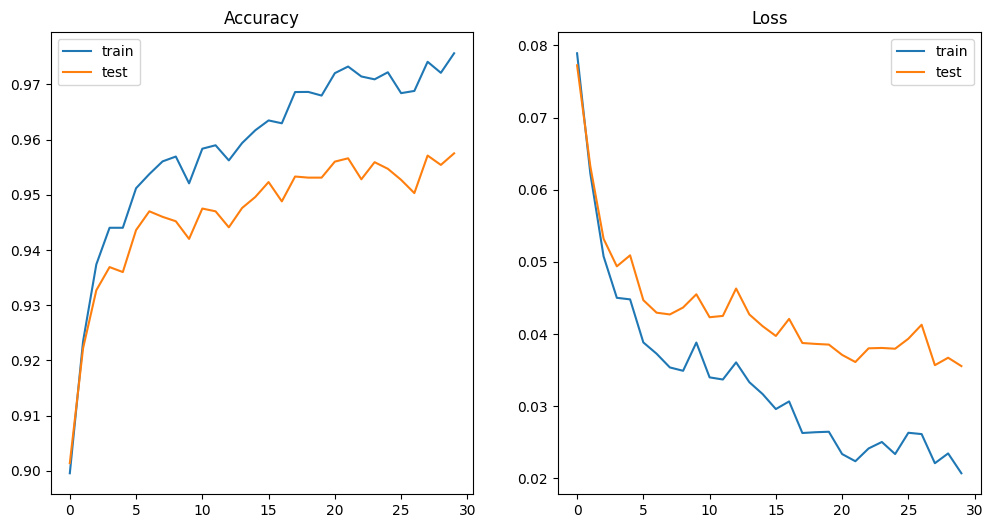

In [39]:
Net2layer=Network2_layers(30,30)
res2layers=Net2layer.SGD(train_data, 30, 10, 3.0, test_data)
plot_results(res2layers)

In [40]:
np.max([x[1][1] for x in res2layers])

0.9575

The best accuracy on test data we got is **95.75%**. And it take arround 12min.

**Conclusion**

We can see that with this achictecture we have a slightly better performance than what it obtain with the achitecture in the notebook sugested by the lecturer and implemented during the lecture **(95.3% )**

So use more that one hidden layers is a good idea.